In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
plt.style.use('science')
import pandas as pd
from IPython.display import display, Math
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [3]:
c = const.c.cgs.value
amu = const.u.cgs.value
k_B = const.k_B.cgs.value
hplanck = const.h.cgs.value

In [4]:
Fe_mass = 55.85
Mg_mass = 24.31
Na_mass = 22.98977
Ne_mass = 20.179
O_mass = 15.9994
N_mass = 14.0067
Ar_mass = 39.948
Mn_mass = 54.938
Si_mass = 28.0855
S_mass = 32.065

In [5]:
line_id_latex = [r"Fe \textsc{xi}",r"Na \textsc{ix}",r"Fe \textsc{viii}",r"Mg \textsc{ix}",r"Mg \textsc{viii} 782",
           r"Mg \textsc{viii} 762",r"Ne \textsc{viii}",r"O \textsc{vi}",r"Mg \textsc{x}",r"N \textsc{v}",r"Ar \textsc{viii}"]

line_id = ["Fe XI","Na IX","Fe VIII","Mg IX","Mg VIII 782","Mg VIII 772","Ne VIII","O VI","Mg X","N V","Ar VIII"]
line_width = np.array([192.223,228.005,118.057,219.286,199.337,219.486,233.275,248.364,178.198,306.628,144.108])/1.0e3
line_wvl = np.array([680.4266965,681.7591379,697.154969,749.5248989,782.4185872,772.3031131,
                    770.4240727,1037.616475,624.951949,1238.815838,713.7827419])
line_mass = np.array([Fe_mass,Na_mass,Fe_mass,Mg_mass,Mg_mass,Mg_mass,Ne_mass,O_mass,Mg_mass,N_mass,Ar_mass])
line_z2a = np.array([10.0,8.0,7.0,8.0,7.0,7.0,7.0,5.0,9.0,4.0,7])/line_mass 

In [6]:
eis_id_latex = [r"Fe \textsc{viii} 185",r"Fe \textsc{viii} 186",r"Fe \textsc{ix} 188",r"Fe \textsc{x} 184",r"Fe \textsc{xi} 188",
                r"Fe \textsc{xii} 195",r"O \textsc{vi}",r"Mn \textsc{viii}",r"Fe \textsc{xi} 192",r"Fe \textsc{xi} 256",r"Si \textsc{x} 258",
                r"Si \textsc{x} 261",r"Si \textsc{x} 272",r"Si \textsc{x} 277",r"S \textsc{x} 259",r"S \textsc{x} 264",r"Mg \textsc{vii}",
                r"Si \textsc{vii} 272",r"Si \textsc{vii} 274",r"Si \textsc{vii} 275.3",r"Si \textsc{vii} 275.6",r"Fe \textsc{xii} 193",
                r"Fe \textsc{x} 177",r"Fe \textsc{xi} 180"]
eis_id = ["Fe VIII 185","Fe VIII 186","Fe IX 188","Fe X 184","Fe XI 188","Fe XII 195","O VI*","Mn VIII*","Fe XI 192","Fe XI 256","Si X 258",
          "Si X 261","Si X 272","Si X 277","S X 259","S X 264","Mg VII","Si VII 272","Si VII 274","Si VII 275.3","Si VII 275.6","Fe XII 193",
          "Fe X 177","Fe XI 180"]
eis_width = np.array([0.034910656,0.038373349,0.041806027,0.039610528,0.043540715,0.048296935,0.044669832,0.039813866,0.051915931,
                     0.046869541,0.04704959,0.044483074,0.06269086,0.07153037,0.048120099,0.037743131,0.056662103,0.064922984,
                      0.047765091,0.061937016,0.055539751,0.044107867,0.042968173,0.049174627])
eis_wvl = np.array([185.2130,186.5980,188.4930,184.5370,188.2160,195.1190,184.1170,185.4550,192.6270,256.9190,258.3740,
                   261.0560,271.9920,277.2640,259.4960,264.2300,276.1540,272.6470,274.1800,275.3610,275.6750,193.5090,177.2400,
                   180.4010])
eis_mass = np.array([Fe_mass,Fe_mass,Fe_mass,Fe_mass,Fe_mass,Fe_mass,O_mass,Mn_mass,Fe_mass,Fe_mass,Si_mass,Si_mass,Si_mass,Si_mass,
                    S_mass,S_mass,Mg_mass,Si_mass,Si_mass,Si_mass,Si_mass,Fe_mass,Fe_mass,Fe_mass])
eis_z2a = np.array([7.0,7.0,8.0,9.0,10.0,11.0,5.0,7.0,10.0,10.0,9.0,9.0,9.0,9.0,9.0,9.0,6.0,6.0,6.0,6.0,6.0,11.0,9.0,10.0])/eis_mass

In [116]:
eis_wvl.shape

(21,)

In [7]:
turb_max = np.min(line_width)
line_width_min = np.sqrt(line_width**2 - turb_max**2)
temp_max = np.square(line_width/line_wvl*c)*line_mass*amu/2/k_B/(4*np.log(2))
temp_min = np.square(line_width_min/line_wvl*c)*line_mass*amu/2/k_B/(4*np.log(2))
temp_aver = (temp_max+temp_min)/2

In [8]:
line_width_all = np.concatenate((line_width,eis_width))
line_wvl_all = np.concatenate((line_wvl,eis_wvl))
line_width_all = line_width_all/line_wvl_all*c
line_mass_all = np.concatenate((line_mass,eis_mass))
line_z2a_all = np.concatenate((line_z2a,eis_z2a))
line_id_all = line_id + eis_id
line_id_latex_all = line_id_latex + eis_id_latex

turb_max_all = np.min(line_width_all)
line_width_min_all = np.sqrt(line_width_all**2 - turb_max_all**2)
temp_max_all = np.square(line_width_all)*line_mass_all*amu/2/k_B/(4*np.log(2))
temp_min_all = np.square(line_width_min_all)*line_mass_all*amu/2/k_B/(4*np.log(2))
temp_aver_all = (temp_max_all+temp_min_all)/2

In [9]:
line_df = pd.DataFrame({"line id":line_id_all,"line wvl":line_wvl_all,"line width":line_width_all*line_wvl_all/c,"line veff":line_width_all*1.e-5,
                        "line mass":line_mass_all,"line charge":line_z2a_all*line_mass_all, "Tmax":np.log10(temp_max_all), 
                        "Tmin":np.log10(temp_min_all+1)})
line_df

,line id,line wvl,line width,line veff,line mass,line charge,Tmax,Tmin
0,Fe XI,680.426697,0.192223,84.692452,55.85000,10.0,6.938963,6.810734
1,Na IX,681.759138,0.228005,100.261479,22.98977,8.0,6.700053,6.612581
2,Fe VIII,697.154969,0.118057,50.767189,55.85000,7.0,6.494440,5.954557
3,Mg IX,749.524899,0.219286,87.709280,24.31000,8.0,6.608126,6.489867
4,Mg VIII 782,782.418587,0.199337,76.378207,24.31000,7.0,6.487974,6.324077
5,Mg VIII 772,772.303113,0.219486,85.200029,24.31000,7.0,6.582915,6.456454
6,Ne VIII,770.424073,0.233275,90.773495,20.17900,7.0,6.557068,6.447739
7,O VI,1037.616475,0.248364,71.758358,15.99940,5.0,6.252099,6.060898
8,Mg X,624.951949,0.178198,85.482438,24.31000,9.0,6.585789,6.460296
9,N V,1238.815838,0.306628,74.203735,14.00670,4.0,6.223438,6.047535


In [10]:
line_df.loc[line_df["line id"].str.contains("Fe X ")]

,line id,line wvl,line width,line veff,line mass,line charge,Tmax,Tmin
14,Fe X 184,184.537,0.039611,64.349900,55.85,9.0,6.700369,6.446341
33,Fe X 177,177.240,0.042968,72.678482,55.85,9.0,6.806085,6.620886


In [64]:
for ii in range(11):
    print(line_id[ii],np.log10(temp_min[ii]+1),np.log10(temp_max[ii]))

Fe XI 7.091102035957375 7.247569402542834
Na IX 6.308574985336076 6.626205689289733
Fe VIII 0.0 6.707269794899864
Mg IX 6.268243071193777 6.576772589637273
Mg VIII 782 6.275932206740368 6.5621552567687855
Mg VIII 772 6.227491327731757 6.543577227656377
Ne VIII 6.196631391840383 6.488606759708563
O VI 6.051354277117245 6.2533104837652
Mg X 5.6495697161687985 6.506060539635012
N V 6.015473804198062 6.158678540403893
Ar VIII 6.217320671621195 6.709853123095423


In [114]:
for ii in range(32):
    print("{:15s} {:5.2f} {:5.2f}".format(line_id_all[ii],np.log10(temp_min_all[ii]+1),np.log10(temp_max_all[ii])))

Fe XI            7.19  7.25
Na IX            6.52  6.63
Fe VIII          6.46  6.71
Mg IX            6.45  6.58
Mg VIII 782      6.43  6.56
Mg VIII 772      6.40  6.54
Ne VIII          6.36  6.49
O VI             6.06  6.25
Mg X             6.35  6.51
N V              5.95  6.16
Ar VIII          6.55  6.71
Fe VIII*         6.22  6.59
Fe VIII*         6.38  6.66
Fe IX*           6.50  6.73
Fe X*            6.45  6.70
Fe XI 188        6.56  6.77
Fe XII*          6.65  6.82
O VI*            6.08  6.26
Mn VIII*         6.44  6.69
Fe XI 192        6.60  6.80
Fe XI 256        6.15  6.56
Si X 258         5.84  6.26
Si X 261         5.67  6.20
Si X 272         6.25  6.46
Si X 277         6.40  6.56
S X 259          5.94  6.33
S X 264          0.00  6.11
Mg VII           6.01  6.30
Si VII 272       6.30  6.49
Si VII 274       5.74  6.22
Si VII 275.3     6.22  6.44
Si VII 275.6     6.04  6.35


Text(0.5, 0, '$Z/A$')

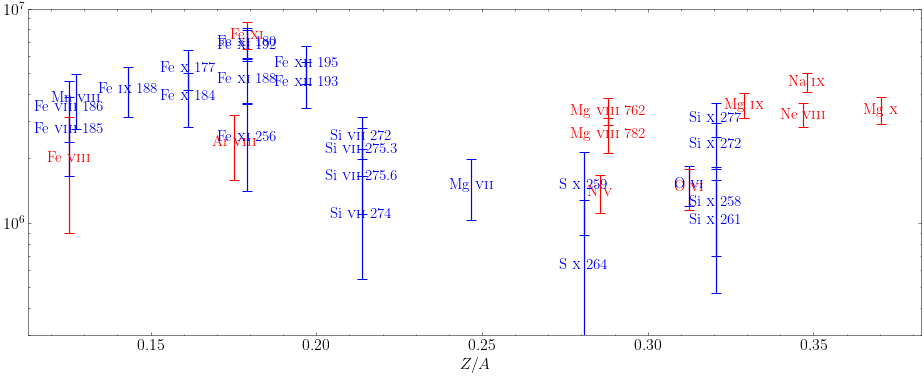

In [13]:
fig,ax = plt.subplots(figsize=(16,6))
ax.errorbar(line_z2a_all[:11],temp_aver_all[:11],[(temp_aver_all-temp_min_all)[:11],(temp_max_all-temp_aver_all)[:11]],
            marker=None,fmt="none",capsize=5,lw=1.2,color = 'red')
ax.errorbar(line_z2a_all[11:],temp_aver_all[11:],[(temp_aver_all-temp_min_all)[11:],(temp_max_all-temp_aver_all)[11:]],
            marker=None,fmt="none",capsize=5,lw=1.2,color = 'blue')
ax.set_yscale("log")
for ii in range(11):
    ax.text(line_z2a_all[ii],temp_aver_all[ii],line_id_latex_all[ii],ha = 'center',va = 'center',
            color = 'red',fontsize = 15,linespacing=1.5)
for ii in range(11,35):
    ax.text(line_z2a_all[ii],temp_aver_all[ii],line_id_latex_all[ii],ha = 'center',va = 'center',
            color = 'blue',fontsize = 15,linespacing=1.5)
ax.set_ylim(3e5,1e7)
#ax.set_xticks(np.arange(10))
#ax.set_xticklabels(line_id_latex)
ax.tick_params(labelsize=16)
ax.set_xlabel(r"$Z/A$",fontsize=16)
#ax.xaxis.set_major_locator(plt.MaxNLocator(13))